In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
fontsize = 13
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

In [12]:
sigma = 3.405 # angstroms
epsilon = 0.238
U0 = 5*epsilon
delta = 0.5
x0 = 5
myx = np.linspace(-25, 25, 1000)
U = 2 * U0 * (np.arctan((myx + x0) / delta) - np.arctan((myx - x0) / delta))
F = 2 * U0 / ((myx - x0)**2)/delta**2 - U0 / ((myx + x0)**2)/delta**2

In [13]:
PMF = np.loadtxt('PMF.dat')

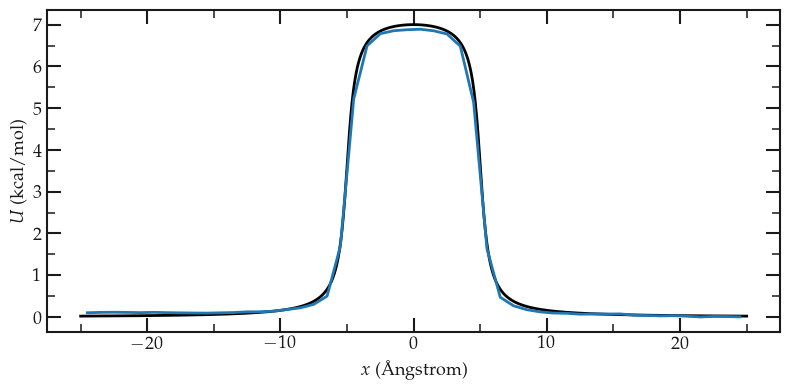

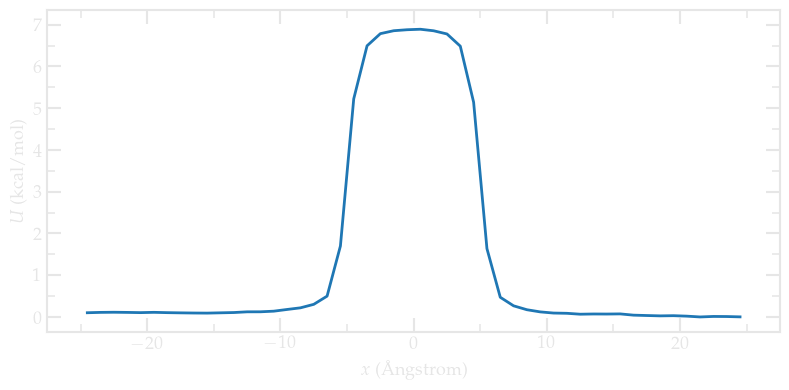

In [14]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(8, 4))
    ax1 = fig.add_subplot(111)

    if mode == 'light':
        plt.plot(myx, U, linewidth = 2, color='black')
    else:
        plt.plot(myx, U, linewidth = 2, color='white')
    plt.plot(PMF.T[0], PMF.T[1], linewidth = 2)

    divider = make_axes_locatable(ax1)
    ax1.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
    ax1.set_xlabel(r'$x$ (Ångstrom)', fontdict=font)
    #ax1.set_xticklabels([])

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=1.5, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.1, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(1.5)
    ax1.spines["bottom"].set_linewidth(1.5)
    ax1.spines["left"].set_linewidth(1.5)
    ax1.spines["right"].set_linewidth(1.5)
    #ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_yticks([0.001, 0.01, 0.1, 1])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)


    fig.tight_layout()
    if mode == 'light':
        plt.savefig('freeenergy-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../docs/sphinx/source/tutorials/figures/umbrellasampling/freeenergy-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('freeenergy-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../docs/sphinx/source/tutorials/figures/umbrellasampling/freeenergy-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()